*Here the attempt has been made to do initial data exploratory analysis and then depending on understading of data,*
*perform data cleaning*

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
#reading csv
df1 = pd.read_csv("..\data\AB_NYC_2019.csv")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Categorical Variable types we have are:
1. host_name
2. neighbourhood_group
3. neighbourhood
4. room_type(private,shared,Entire home/apt)

In [4]:
df1.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
df1.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

<sub> null values are in both review labels, name and hostname
and those variables don't seem to be useful for us </sub>

In [6]:
mean = df1['reviews_per_month'].mean()
df1['reviews_per_month'].fillna(mean, inplace=True)
df1.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
#dropping columns
df_price = df1['price'].to_list
df1= df1.drop(['name','id' ,'host_id','host_name', 'last_review'],axis=1)

In [8]:
#duplicacy checking
duplicate_data = df1.duplicated()
print(duplicate_data.sum())
df1[duplicate_data]

0


,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365


Text(0.5, 1.0, 'Correlation Matrix')

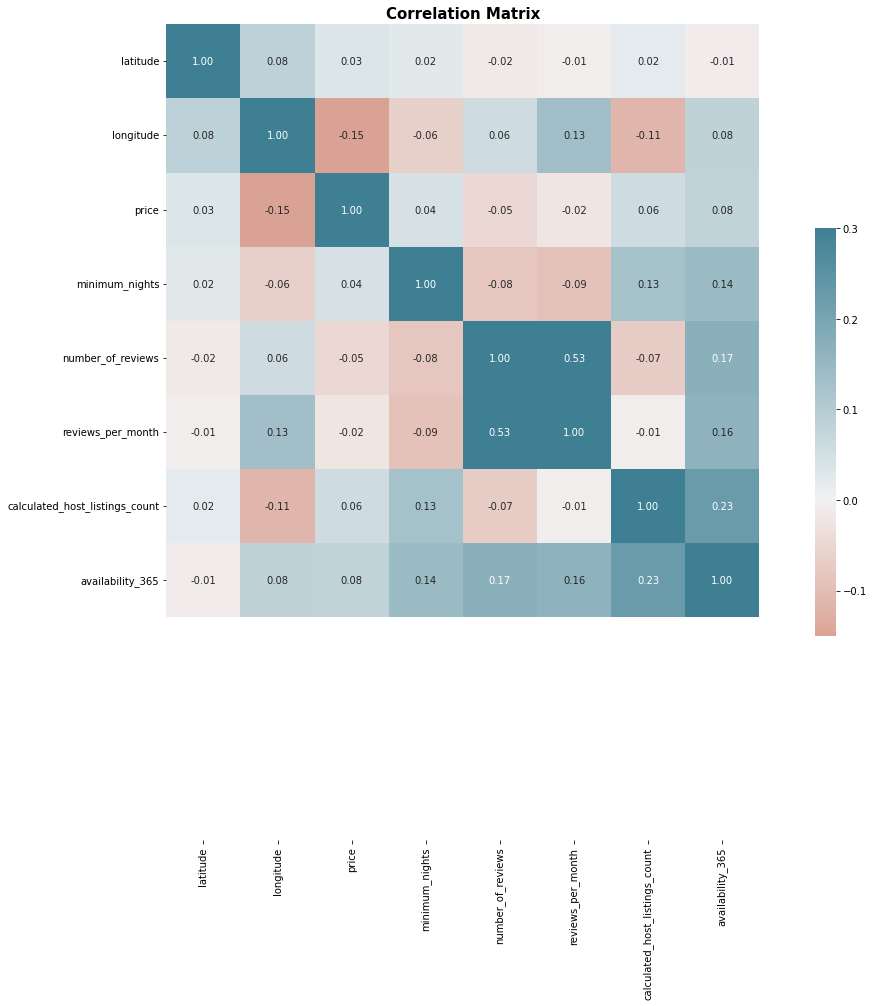

In [13]:
plt.figure(figsize=(20,15))
palette = sns.diverging_palette(20, 220, n=256)
corr=df1.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt=".2f", cmap=palette, vmax=.3, center=0,
            square=True, cbar_kws={"shrink": .5}).set(ylim=(11, 0))
plt.title("Correlation Matrix",size=15, weight='bold')

Plotting graphs

Text(0.5, 1.0, 'Room Type vs Price')

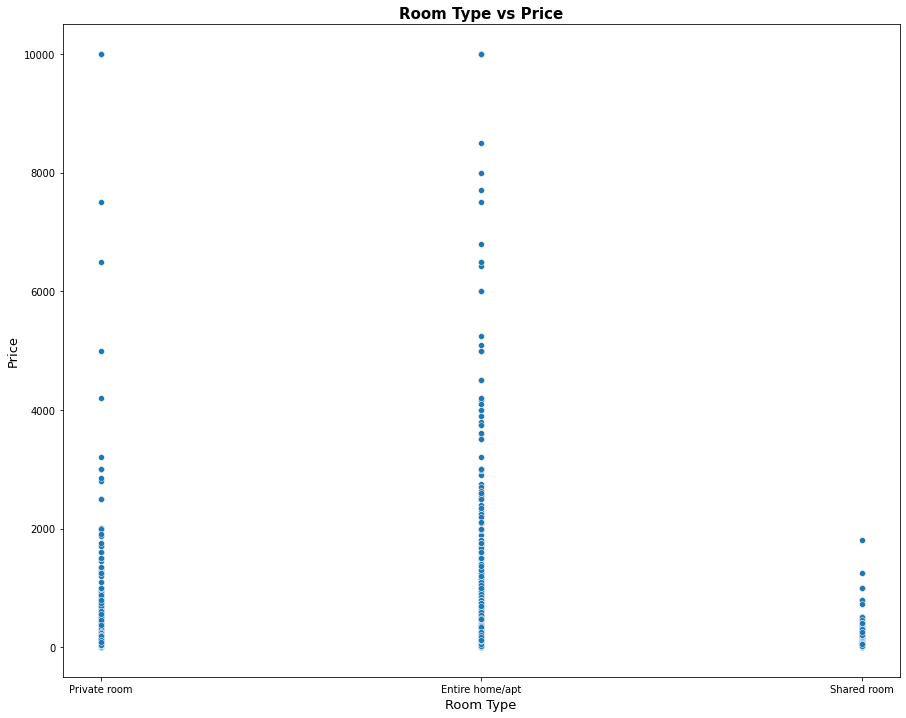

In [15]:
plt.figure(figsize=(15,12))
sns.scatterplot(x='room_type', y='price', data=df1)

plt.xlabel("Room Type", size=13)
plt.ylabel("Price", size=13)
plt.title("Room Type vs Price",size=15, weight='bold')

Text(0.5, 1.0, 'Room Type vs Price vs Neighbourhood Group')

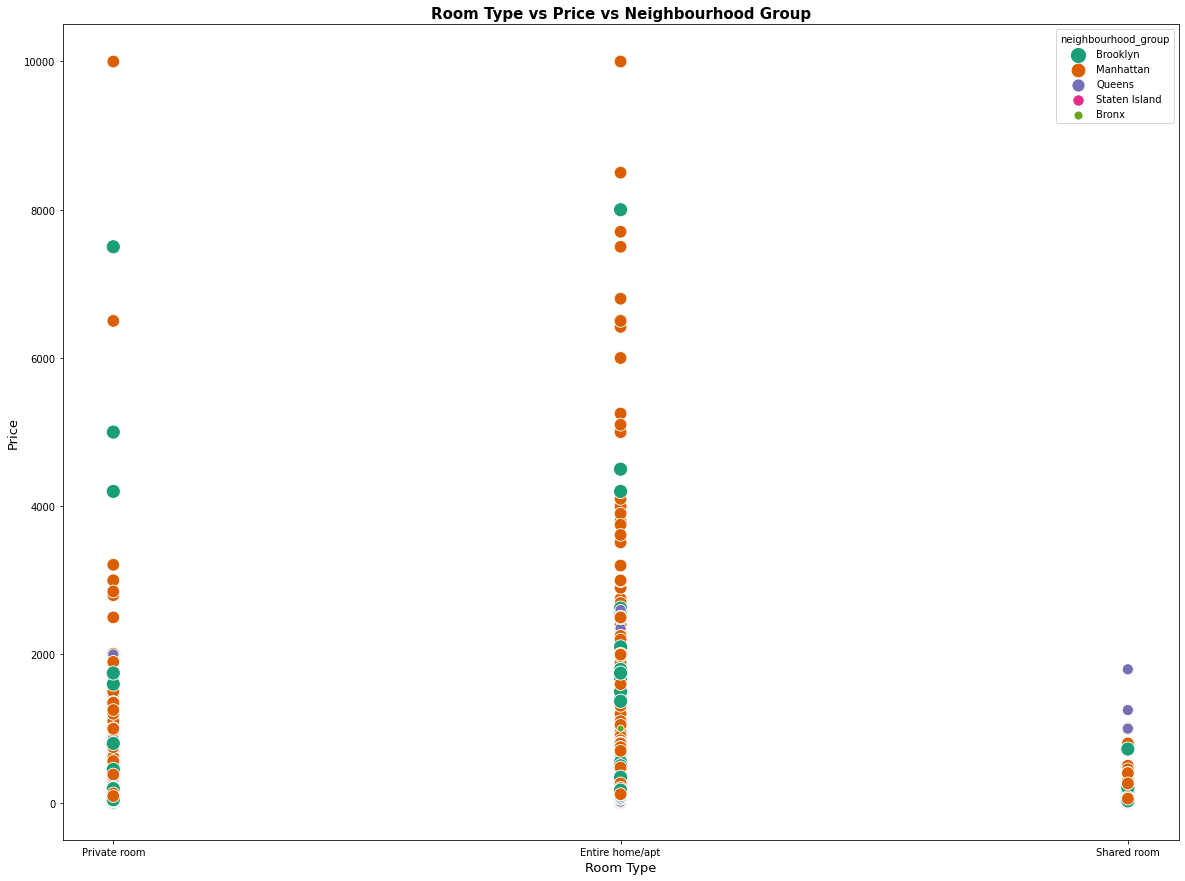

In [16]:
plt.figure(figsize=(20,15))
sns.scatterplot(x="room_type", y="price",
            hue="neighbourhood_group", size="neighbourhood_group",
            sizes=(50, 200), palette="Dark2", data=df1)

plt.xlabel("Room Type", size=13)
plt.ylabel("Price", size=13)
plt.title("Room Type vs Price vs Neighbourhood Group",size=15, weight='bold')

In [ ]:
#do categorial data handling here

In [ ]:
nyc_model_x, nyc_model_y = df1.iloc[:,:-1], df1.iloc[:,-1]
scaler = StandardScaler()
nyc_model_x = scaler.fit_transform(nyc_model_x)
X_train, X_test, y_train, y_test = train_test_split(nyc_model_x, nyc_model_y, test_size=0.3,random_state=42)

In [ ]:
lab_enc = preprocessing.LabelEncoder()

feature_model = ExtraTreesClassifier(n_estimators=50)
feature_model.fit(X_train,lab_enc.fit_transform(y_train))

plt.figure(figsize=(7,7))
feat_importances = pd.Series(feature_model.feature_importances_, index=nyc_model.iloc[:,:-1].columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
df1 = df1.drop(['price'],axis=1)

**Exporting data**

In [ ]:
.to_csv("../data/filename.csv", index=False)